In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from utils.dataframe_cleaning import *

In [2]:
final_dataset_path = '../dataset/final/windows/'
acc_dataset_path = final_dataset_path + 'PatchTable_Acceleration.csv'
gyro_dataset_path = final_dataset_path + 'PatchTable_Gyroscope.csv'

|# 1. Data Preprocessing
This first section focuses on visualising the data and using preprocessing techniques to clean the data. The features are also scaled using Z-score normalisation.

### Null Values Counts

In [3]:
acc_dataset_df = pd.read_csv(acc_dataset_path)
gyro_dataset_df = pd.read_csv(gyro_dataset_path)

In [4]:
acc_dataset_df.head()

,Subject,ProtocolCode,Protocol,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,2,0,Stationary_NonTremor,5.687500,4.468750,4.468750,5.687500,5.916848e+06,2.844934e+06,4.543174e+06,...,52.041667,52.041667,423.440233,2.252572,21.598636,6.388638,49.169180,0.036859,-17.896844,21908.211961
1,2,0,Stationary_NonTremor,1.015625,5.890625,5.890625,5.890625,1.353538e+06,9.118001e+05,1.469789e+06,...,52.041667,52.041667,134.626143,0.345041,1.691798,8.347248,85.635885,0.030449,-16.976849,7489.380694
2,2,0,Stationary_NonTremor,0.609375,5.687500,5.687500,5.687500,9.353891e+05,5.983811e+05,1.555500e+06,...,52.041667,52.041667,121.958715,0.321501,1.599229,8.772797,91.368012,0.027244,-16.976849,7389.055314
3,2,0,Stationary_NonTremor,7.921875,5.890625,5.687500,5.687500,1.133802e+06,7.104361e+05,1.878356e+06,...,52.041667,52.041667,123.350454,0.328310,1.658965,8.818853,92.100299,0.025641,-16.976849,7780.680860
4,2,0,Stationary_NonTremor,5.281250,5.890625,4.875000,1.218750,1.296214e+06,9.777810e+05,1.567592e+06,...,52.041667,52.041667,199.279476,0.452757,2.036082,6.683400,57.573726,0.022436,-5.804140,10518.975874


In [5]:
gyro_dataset_df.head()

,Subject,ProtocolCode,Protocol,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,2,0,Stationary_NonTremor,1.828125,2.031250,1.015625,1.015625,3.311960e+09,4.110357e+09,7.963235e+08,...,52.041667,52.041667,2.546933e+06,1.522844e+08,1.671659e+13,8.895377,95.178903,0.004808,-403.209734,1.306758e+08
1,2,0,Stationary_NonTremor,1.015625,3.453125,1.015625,0.812500,4.335349e+08,1.405635e+09,1.349310e+08,...,52.041667,52.041667,8.685088e+04,3.195561e+05,2.803501e+09,15.519586,269.644898,0.000000,-403.209734,2.363304e+07
2,2,0,Stationary_NonTremor,1.421875,3.250000,3.046875,3.656250,1.892875e+08,5.414885e+08,9.644399e+07,...,52.041667,52.041667,9.281421e+04,6.620607e+05,9.056037e+09,16.810921,298.654468,0.001603,-304.373695,1.647435e+07
3,2,0,Stationary_NonTremor,3.250000,3.250000,3.250000,3.250000,2.371075e+08,3.643789e+08,1.097134e+08,...,52.041667,52.041667,1.044456e+05,1.088526e+06,1.987016e+10,17.496185,318.893864,0.001603,-304.373695,1.054477e+07
4,2,0,Stationary_NonTremor,2.437500,1.015625,3.046875,1.625000,4.957506e+08,5.142996e+08,2.315345e+08,...,52.041667,52.041667,3.661111e+05,8.014137e+06,3.758302e+11,16.565575,301.099358,0.001603,-234.841185,1.790008e+07


In [6]:
null_counts_acc = get_null_count_columns(acc_dataset_df.iloc[:, 3:])
null_counts_gyro = get_null_count_columns(gyro_dataset_df.iloc[:, 3:])

acc_null_df = pd.DataFrame(data=null_counts_acc, index=['Null Counts Acceleration'])
gyro_null_df = pd.DataFrame(data=null_counts_gyro, index=['Null Counts Gyroscope'])

#### Acceleration Data Null Values

In [7]:
print("Number of features with at least one Null value: " + str(len(acc_null_df.columns)))
acc_null_df

Number of features with at least one Null value: 18


,Width_VT,Width_ML,Width_AP,Slope_VT,Slope_ML,Slope_AP,WidthNorm_VT,WidthNorm_ML,WidthNorm_AP,SlopeNorm_VT,SlopeNorm_ML,SlopeNorm_AP,IndexHarmonicity_VT,IndexHarmonicity_ML,IndexHarmonicity_AP,HarmonicRatio_VT,HarmonicRatio_ML,HarmonicRatio_AP
Null Counts Acceleration,129,198,146,129,198,146,129,198,146,129,198,146,127,127,127,127,127,127


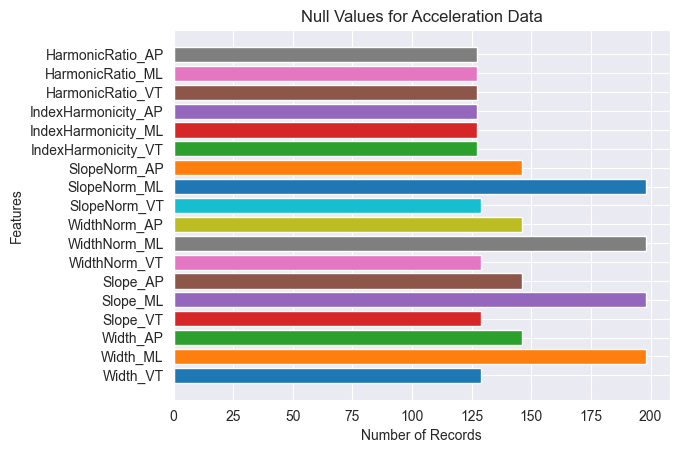

In [8]:
# Plots null counts on bar graph for Acceleration Data
for column in acc_null_df.columns:
    plt.barh(column, acc_null_df[column].iloc[0], label=column)

plt.title('Null Values for Acceleration Data')
plt.xlabel('Number of Records')
plt.ylabel('Features')
plt.show()

#### Gyroscope Data Null Values

In [9]:
print("Number of features with at least one Null value: " + str(len(gyro_null_df.columns)))
gyro_null_df

Number of features with at least one Null value: 18


,Width_VT,Width_ML,Width_AP,Slope_VT,Slope_ML,Slope_AP,WidthNorm_VT,WidthNorm_ML,WidthNorm_AP,SlopeNorm_VT,SlopeNorm_ML,SlopeNorm_AP,IndexHarmonicity_VT,IndexHarmonicity_ML,IndexHarmonicity_AP,HarmonicRatio_VT,HarmonicRatio_ML,HarmonicRatio_AP
Null Counts Gyroscope,90,54,101,90,54,101,90,54,101,90,54,101,71,71,71,71,71,71


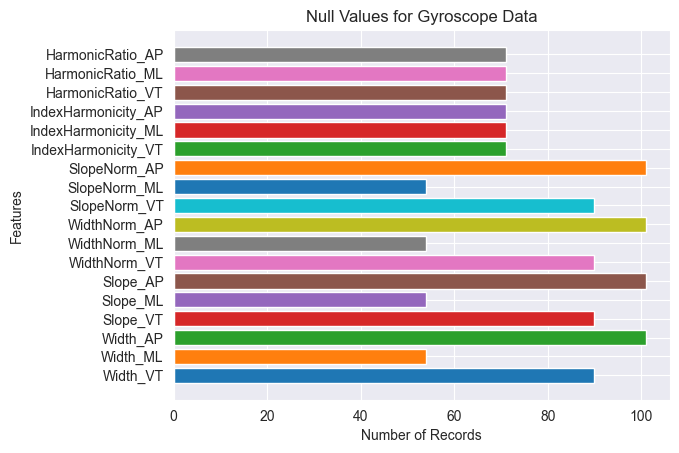

In [10]:
# Plots null counts on bar graph for Acceleration Data
for column in gyro_null_df.columns:
    plt.barh(column, gyro_null_df[column].iloc[0], label=column)

plt.title('Null Values for Gyroscope Data')
plt.xlabel('Number of Records')
plt.ylabel('Features')
plt.show()

#### Removal of Null Value Features

In [11]:
acc_cols_to_drop = acc_null_df.columns.tolist()
gyro_cols_to_drop = gyro_null_df.columns.tolist()

acc_dataset_df = acc_dataset_df.drop(acc_cols_to_drop, axis=1)
gyro_dataset_df = gyro_dataset_df.drop(gyro_cols_to_drop, axis=1)

In [12]:
acc_dataset_df

,Subject,ProtocolCode,Protocol,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,2,0,Stationary_NonTremor,5.687500,4.468750,4.468750,5.687500,5.916848e+06,2.844934e+06,4.543174e+06,...,52.041667,52.041667,423.440233,2.252572,2.159864e+01,6.388638,49.169180,0.036859,-17.896844,2.190821e+04
1,2,0,Stationary_NonTremor,1.015625,5.890625,5.890625,5.890625,1.353538e+06,9.118001e+05,1.469789e+06,...,52.041667,52.041667,134.626143,0.345041,1.691798e+00,8.347248,85.635885,0.030449,-16.976849,7.489381e+03
2,2,0,Stationary_NonTremor,0.609375,5.687500,5.687500,5.687500,9.353891e+05,5.983811e+05,1.555500e+06,...,52.041667,52.041667,121.958715,0.321501,1.599229e+00,8.772797,91.368012,0.027244,-16.976849,7.389055e+03
3,2,0,Stationary_NonTremor,7.921875,5.890625,5.687500,5.687500,1.133802e+06,7.104361e+05,1.878356e+06,...,52.041667,52.041667,123.350454,0.328310,1.658965e+00,8.818853,92.100299,0.025641,-16.976849,7.780681e+03
4,2,0,Stationary_NonTremor,5.281250,5.890625,4.875000,1.218750,1.296214e+06,9.777810e+05,1.567592e+06,...,52.041667,52.041667,199.279476,0.452757,2.036082e+00,6.683400,57.573726,0.022436,-5.804140,1.051898e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,7,5,Drawing_Tremor,3.453125,3.656250,1.218750,3.453125,4.258702e+07,4.707873e+07,9.775131e+07,...,52.041667,52.041667,3742.740749,197.339148,1.913160e+04,6.901307,58.970933,0.059295,-56.022057,1.946148e+05
2317,7,5,Drawing_Tremor,3.859375,3.859375,3.453125,3.453125,6.378745e+07,6.389390e+07,1.692045e+08,...,52.041667,52.041667,3760.727504,200.939771,1.939211e+04,6.808104,56.756456,0.056090,-56.022057,1.957211e+05
2318,7,5,Drawing_Tremor,1.015625,1.828125,1.625000,7.515625,6.506385e+07,7.144997e+07,2.256572e+08,...,52.041667,52.041667,5904.548957,489.162517,7.082553e+04,6.546513,53.259405,0.057692,-56.022057,3.075192e+05
2319,7,5,Drawing_Tremor,2.640625,3.859375,1.421875,7.515625,1.317645e+08,1.507618e+08,2.954823e+08,...,52.041667,52.041667,10950.687512,1241.500904,2.811915e+05,6.428085,56.893972,0.056090,-117.027719,5.789895e+05


### Normalisation
Using z value feature normalisation/standardisation

In [13]:
acc_z_scores = zscore(acc_dataset_df.iloc[:, 3:].astype(float))
gyro_z_scores = zscore(gyro_dataset_df.iloc[:, 3:].astype(float))

# Create a new DataFrame with Z-scores
norm_acc_df = pd.DataFrame(acc_z_scores, columns=acc_dataset_df.columns[3:])
norm_gyro_df = pd.DataFrame(gyro_z_scores, columns=gyro_dataset_df.columns[3:])

norm_acc_df = pd.concat([acc_dataset_df.iloc[:, :3], norm_acc_df], axis=1)
norm_gyro_df = pd.concat([gyro_dataset_df.iloc[:, :3], norm_gyro_df], axis=1)

In [14]:
norm_acc_null_count = get_null_count_columns(norm_acc_df.iloc[:, 3:])
norm_gyro_null_count = get_null_count_columns(norm_gyro_df.iloc[:, 3:])

In [15]:
norm_acc_df = norm_acc_df.drop(columns=list(norm_acc_null_count.keys()))
norm_gyro_df = norm_gyro_df.drop(columns=list(norm_gyro_null_count.keys()))

In [16]:
norm_acc_df

,Subject,ProtocolCode,Protocol,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanPSD_Plomb_Magnitude,MedianPSD_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,2,0,Stationary_NonTremor,0.686084,0.799759,0.662938,0.516170,-0.286025,-0.192298,-0.460258,...,-0.625207,-0.160165,-0.625207,-0.275923,-0.146354,-0.136085,-0.247517,-1.673055,0.920095,-0.626306
1,2,0,Stationary_NonTremor,-1.241966,1.616715,1.418727,0.602397,-0.287526,-0.192634,-0.462998,...,-0.632698,-0.224008,-0.632698,-0.275942,-0.146354,0.869507,0.659785,-2.224679,0.927140,-0.633479
2,2,0,Stationary_NonTremor,-1.409622,1.500007,1.310757,0.516170,-0.287664,-0.192689,-0.462921,...,-0.633027,-0.224149,-0.633027,-0.275942,-0.146354,1.087993,0.802402,-2.500492,0.927140,-0.633529
3,2,0,Stationary_NonTremor,1.608195,1.616715,1.310757,0.516170,-0.287599,-0.192669,-0.462633,...,-0.632991,-0.224243,-0.632991,-0.275942,-0.146354,1.111640,0.820622,-2.638398,0.927140,-0.633335
4,2,0,Stationary_NonTremor,0.518428,1.616715,0.878877,-1.380813,-0.287545,-0.192623,-0.462910,...,-0.631021,-0.194513,-0.631021,-0.275941,-0.146354,0.015253,-0.038410,-2.914210,1.012689,-0.631972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,7,5,Drawing_Tremor,-0.236027,0.332927,-1.064580,-0.432321,-0.273962,-0.184604,-0.377165,...,-0.539109,-0.211034,-0.539109,-0.274006,-0.146326,0.127130,-0.003647,0.257631,0.628169,-0.540388
2317,7,5,Drawing_Tremor,-0.068370,0.449635,0.123088,-0.432321,-0.266988,-0.181680,-0.313466,...,-0.538642,-0.219069,-0.538642,-0.273970,-0.146326,0.079278,-0.058744,-0.018182,0.628169,-0.539838
2318,7,5,Drawing_Tremor,-1.241966,-0.717445,-0.848640,1.292209,-0.266568,-0.180366,-0.263140,...,-0.483034,-0.161842,-0.483034,-0.271137,-0.146252,-0.055028,-0.145751,0.119725,0.628169,-0.484220
2319,7,5,Drawing_Tremor,-0.571340,0.449635,-0.956610,1.292209,-0.244625,-0.166571,-0.200893,...,-0.352145,0.694776,-0.352145,-0.263742,-0.145949,-0.115832,-0.055322,-0.018182,0.161046,-0.349169


In [17]:
norm_gyro_df

,Subject,ProtocolCode,Protocol,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanPSD_Plomb_Magnitude,MedianPSD_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,2,0,Stationary_NonTremor,-0.852228,-0.743343,-1.225989,-0.744022,-1.718448,-1.219935,-1.464674,...,-1.458231,2.285799,-1.458231,-0.657754,-0.306981,-0.381351,-0.473435,-1.973572,2.615209,-1.617813
1,2,0,Stationary_NonTremor,-1.275085,-0.044720,-1.225989,-0.868500,-1.813302,-1.282715,-1.486126,...,-2.153873,-0.977504,-2.153873,-0.704806,-0.309336,1.973595,2.185284,-2.342712,2.615209,-2.162402
2,2,0,Stationary_NonTremor,-1.063656,-0.144523,-0.037334,0.874185,-1.821351,-1.302773,-1.487375,...,-2.152187,-0.978207,-2.152187,-0.704699,-0.309335,2.432673,2.627367,-2.219666,2.871749,-2.198823
3,2,0,Stationary_NonTremor,-0.112228,-0.144523,0.081531,0.625230,-1.819775,-1.306884,-1.486944,...,-2.148898,-0.964941,-2.148898,-0.704567,-0.309334,2.676288,2.935799,-2.219666,2.871749,-2.228990
4,2,0,Stationary_NonTremor,-0.535085,-1.242359,-0.037334,-0.370590,-1.811252,-1.303404,-1.482993,...,-2.074906,-0.584054,-2.074906,-0.702423,-0.309284,2.345451,2.664625,-2.219666,3.052229,-2.191569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,7,5,Drawing_Tremor,-0.535085,-1.042753,-1.344855,-0.246112,-1.324311,-0.815962,-0.688804,...,-0.655592,-0.979479,-0.655592,-0.366734,-0.247326,0.789802,0.773843,-0.866152,0.762694,-0.694685
2317,7,5,Drawing_Tremor,-0.640799,-1.042753,1.389051,-0.121635,-1.032639,-0.559776,-0.198007,...,0.370427,0.433144,0.370427,-0.002387,-0.178805,-0.497162,-0.671926,-0.989198,0.981016,0.061397
2318,7,5,Drawing_Tremor,-0.323656,-1.142556,-1.344855,-0.246112,-0.809995,0.242708,0.557345,...,0.924014,0.377990,0.924014,0.530060,0.048738,0.041941,-0.151415,-0.743105,0.981016,0.698839
2319,7,5,Drawing_Tremor,-0.640799,-1.142556,-1.344855,-0.246112,-0.336255,0.464279,1.207973,...,0.987351,1.228945,0.987351,0.381994,0.038128,0.670372,0.823095,-0.497011,1.056835,1.217446


#### Saving to CSV

In [18]:
norm_acc_df.to_csv(final_dataset_path + 'PatchTable_Acceleration_Normalised.csv', index=False)
norm_gyro_df.to_csv(final_dataset_path + 'PatchTable_Gyroscope_Normalised.csv', index=False)